In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('ex1data1.txt')
data

,population,price
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
def costfunction(X, Y, theta):
    m = len(Y)
    #predictions =  X.dot(theta)                    #97*1
    
    predictions =  np.dot(X, theta)   
    square_err=(predictions - Y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [4]:
first_split = data.sample(frac=1,random_state=1)


data_n = first_split.values
m = len(data_n[:,0])

c1x = first_split[['population']].to_numpy()
X = np.append(np.ones((m,1)), c1x, axis = 1)          #97*2 using to append to add ones layer


Y = first_split[['price']].to_numpy()    #97*2

theta = np.zeros((2,1))                                #2*1

costfunction(X,Y, theta)

32.07273387745566

In [5]:
def gradientdescent(theta, X, Y, num_iters, alpha):
    m = len(Y)
    j_history = []
    for i in range(num_iters):
        
        easy = X.dot(theta) - Y
        dif = np.dot(X.transpose(), easy)
        
        theta = theta - (alpha/m) * dif
        j_history.append(costfunction(X, Y, theta))
        
    return theta, j_history

In [6]:
theta, j_history = gradientdescent(theta, X, Y, 1500, 0.01)

In [7]:
theta.shape


(2, 1)

In [8]:
def predict(x, theta):
    
    prediction = np.dot(theta.transpose(),x)
    return prediction[0]

predict(np.array([1,6.3589]), theta)
    

3.7864901101445727

In [9]:
def check_accuracy(test):
    test_data = test.values
    
    X_test = test_data[:,0]
    Y_test = test_data[:,1]
    difference = []
    
    for index,i in enumerate(X_test):
        j = np.array([i])
        j = np.array([1,i])
        prediction = predict(j, theta)
        error = Y_test[index] - prediction
        percentage = (abs(error)/Y_test[index])*100
        difference.append(abs(percentage))
        
    return statistics.mean(difference) 
        
        
    
    

first_split    

,population,price
33,5.8918,1.84950
58,9.3102,3.96240
32,9.2482,12.13400
90,5.7077,1.84510
45,7.0931,1.04630
...,...,...
75,6.5479,0.29678
9,5.0546,3.81660
72,6.0062,1.27840
12,5.7340,3.15510


In [10]:
check_accuracy(first_split)

158.35746640088624

Text(0.5, 1.0, 'Profit vs Population')

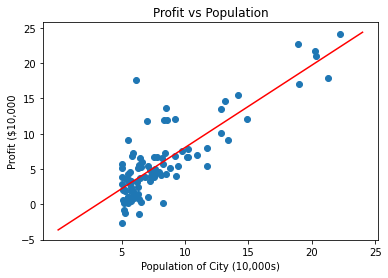

In [35]:
plt.scatter(data['population'],data['price'])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")


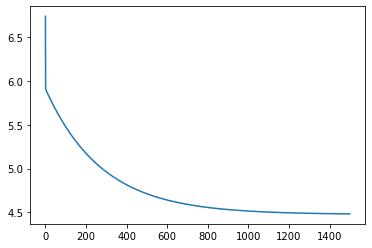

In [36]:
plt.plot(j_history)